In [1]:
import os
import sys
sys.path.append(os.pardir)

In [2]:
import json
import datetime
import pandas as pd
from sklearn import preprocessing
from credible import connectors

In [3]:
engine = connectors.connect_to_sqlite()

In [4]:
%%time
users_raw = pd.read_sql_table('users', engine)
reviews_raw = pd.read_sql_table('reviews', engine)
users_raw.shape, reviews_raw.shape

CPU times: user 1min 19s, sys: 37.2 s, total: 1min 56s
Wall time: 5min 30s


((1637138, 23), (6685900, 10))

In [5]:
%%time
# cleanup tables
users_clean = pd.read_sql_table('users_clean', engine)
reviews_clean = pd.read_sql_table('reviews_clean', engine)
users_clean.shape, reviews_clean.shape

CPU times: user 2.21 s, sys: 400 ms, total: 2.61 s
Wall time: 4.37 s


((166781, 1), (1245408, 1))

In [9]:
reviews_clean

,review_id
0,RS_GTIT6836bCaPy637kNQ
1,Amo5gZBvCuPc_tZNpHwtsA
2,S337tATeouQJdoPYyir29w
3,qm97yMwREr7BKkexlwLFbg
4,CelUWzp-GnJIiiV1mDUb-g
...,...
1245403,40HV3Lh2Mn2InTmT8VIzIg
1245404,PdvJkMZBmFSBXFkUJWSdZg
1245405,yZbleOxC4_k8n4FclEBIRw
1245406,-zfXs0DOn8VjMAt4pf5zJw


In [12]:
%%time
# for debug purposes
users = users_raw[users_raw.user_id.isin(users_clean.user_id)]#.sample(50000)
reviews = reviews_raw[reviews_raw.review_id.isin(reviews_clean.review_id)]#.sample(50000)
users.shape, reviews.shape

CPU times: user 3.52 s, sys: 31.2 ms, total: 3.55 s
Wall time: 3.55 s


((166781, 23), (1245408, 10))

In [13]:
%%time
reviews.date = pd.to_datetime(reviews.date)
reviews['_date'] = reviews.date.dt.date
reviews['_time'] = reviews.date.dt.time

/Users/owl/Projects/review-credibility/venv/credenv/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/owl/Projects/review-credibility/venv/credenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 1.39 s, sys: 39 ms, total: 1.43 s
Wall time: 1.44 s


/Users/owl/Projects/review-credibility/venv/credenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## EDA on Reviews

In [14]:
reviews.sample(2)

,_id,review_id,business_id,user_id,stars,date,text,useful,funny,cool,_date,_time
4297260,4297261,U7PZOFaGbZktQKBE5EiqEQ,tetKWtLT0639lqnD9QJRKw,CC8CjFzY8YjqFsFoCmp69A,3,2016-08-30 00:15:12,They're new so I'm being very forgiving... I t...,2,0,0,2016-08-30,00:15:12
6012176,6012177,S1MyteMyn9IvC7gO-5Q0Xw,WoiFJt1T-BISB3NIlbP9BA,wPbf-q8buiqWuSnqQ0sIJQ,5,2018-10-12 22:00:49,Five Star Barber Shop is legit . Elli my guy a...,0,0,0,2018-10-12,22:00:49


In [15]:
reviews.columns

Index(['_id', 'review_id', 'business_id', 'user_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', '_date', '_time'],
      dtype='object')

## EDA on Users

In [16]:
users.sample(2)

,_id,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
890767,890768,6YAEAWeE6O04aP1cQZjmlg,Vegan,9,2015-05-17 19:55:12,"nNvU90sxpx6lny8CxAkxnA, Hrw-1oSlA0_itb-SOJtjoQ...",5,1,0,2,...,0,0,0,0,0,0,0,0,0,0
103614,103615,KVcbzlMIhn2-qQ9HlVheeQ,Scott,14,2014-10-01 19:33:51,HLKKgN6kvi4eKp_QpQXelQ,25,13,2,0,...,0,0,0,0,1,1,0,0,0,0


In [17]:
users.columns

Index(['_id', 'user_id', 'name', 'review_count', 'yelping_since', 'friends',
       'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos'],
      dtype='object')

## Create User Features

In [7]:
# derived columns to be inserted to database
df = pd.DataFrame()
df['user_id'] = users.user_id
df.sample(2)

,user_id
172,kXdq_tyzV1RbgsjRLyy_yA
1061416,mkd00vw7g7JMN_sfQIxh0Q


### Number of Friends

In [8]:
df['num_of_friends'] = users.friends.apply(lambda x: len(x.split(',')))

In [9]:
df.sample(2)

,user_id,num_of_friends
882547,qF1M11vuXeVn59HI9zX6kQ,7
194065,RW8vjSU4_TCFw52CV3dDYw,64


### Maximum Number of Reviews (In a day)

In [10]:
df_g_user_date = reviews.groupby(
    by=['user_id', '_date']).agg(
        {'_id': 'count', '_time': list, 'business_id': list, 'review_id': list})

In [11]:
df_g_user_date['count_business'] = df_g_user_date.business_id.apply(lambda x: len(set(x)))

In [80]:
df_g_user_date[(df_g_user_date._id > 5)].sample()

,,_id,_time,business_id,review_id,count_business
user_id,_date,,,,,
qKUEhJUl0Z9MFW7R7BTvRQ,2018-07-04,6,"[05:58:32, 03:32:20, 06:33:00, 02:01:20, 02:10...","[mz9ltimeAIy2c2qf5ctljw, DqcD3YflYhArFsC4KVUnO...","[f6MIfLAnpOf-nUX-eaGuig, Z1JDHha1sIJOZBmcZTc73...",6


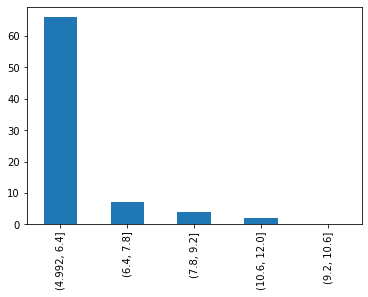

In [359]:
# potential people who has more than 4 reviews in a day
df_g_user_date._id[(df_g_user_date._id > 4)].value_counts(bins=5).plot.bar()

#### Sample user

In [91]:
user_id = '3Vd_ATdvvuVVgn_YCpz8fw'
user_df_g = df_g_user_date[
    (df_g_user_date._id > 2) &
    (df_g_user_date.index.get_level_values('user_id') == user_id)]

In [92]:
user_df_g.sample(3)

_id  \
user_id                _date             
3Vd_ATdvvuVVgn_YCpz8fw 2008-11-15    8   
                       2008-11-02    4   
                       2008-11-16    3   

                                                                               _time  \
user_id                _date                                                           
3Vd_ATdvvuVVgn_YCpz8fw 2008-11-15  [20:42:57, 22:38:27, 21:22:47, 22:47:54, 21:19...   
                       2008-11-02           [16:57:31, 17:22:09, 16:49:51, 16:16:24]   
                       2008-11-16                     [00:09:59, 00:16:27, 17:49:17]   

                                                                         business_id  \
user_id                _date                                                           
3Vd_ATdvvuVVgn_YCpz8fw 2008-11-15  [4wGCv-SmCHbspSwgXALrKw, GyXSPlq4aj0Uxm-UJYnGC...   
                       2008-11-02  [_Y7090jnL5EezPib1ZVF1A, mjhwLcuoenVW8oFhcNmlH...   
                       2008-11-16  [DHUAQ4pzH9KKzGZDm1jZLg, zdcesxBdjljRgS0QmCgkB...   

                                                                           review_id  \
user_id                _date                                                           
3Vd_ATdvvuVVgn_YCpz8fw 2008-11-15  [bzRXrMnKRtLtiWlzy4mnVQ, Z5iKL-mO_oIZqBUBFSKz9...   
                       2008-11-02  [E3zRT51Rd_dX406CzuOVbw, rOiZq2y-zQZElB4Sblhzn...   
                       2008-11-16  [zDml1aALsbUfjWdhyp5PZg, XftWnJfLbE72J2gUtfLup...   

                                   count_business  
user_id                _date                       
3Vd_ATdvvuVVgn_YCpz8fw 2008-11-15               8  
                       2008-11-02               4  
                       2008-11-16               3

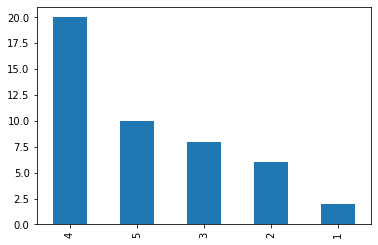

In [94]:
reviews[reviews.user_id == user_id].stars.value_counts().plot.bar()

In [95]:
reviews[reviews.user_id == user_id].text.apply(lambda x: len(x)).mean()

645.7826086956521

In [101]:
from itertools import chain
user_potential_review_ids = list(chain(*user_df_g.review_id))

user_reviews = reviews[reviews.review_id.isin(user_potential_review_ids)]
user_reviews.sample(3)

,_id,review_id,business_id,user_id,stars,date,text,useful,funny,cool,_date,_time
6588673,6588674,-eGaY02M01csyIl3MNEUNQ,2weQS-RnoOBhb1KsHKyoSQ,3Vd_ATdvvuVVgn_YCpz8fw,2,2008-11-15 21:19:13,way expensive like $40 a person-nothing specia...,1,0,1,2008-11-15,21:19:13
4629445,4629446,bzRXrMnKRtLtiWlzy4mnVQ,4wGCv-SmCHbspSwgXALrKw,3Vd_ATdvvuVVgn_YCpz8fw,5,2008-11-15 20:42:57,Unfortunately this place across from the RIO h...,3,0,4,2008-11-15,20:42:57
3294023,3294024,1F9dRqx2tLvb3LWCfMKs9w,q18xbq3Cbyp_BJyfMQxFxg,3Vd_ATdvvuVVgn_YCpz8fw,4,2008-11-15 22:49:43,Super fun store with lots of color and candy ...,0,0,0,2008-11-15,22:49:43


In [102]:
user_reviews.text.apply(lambda x: len(x)).mean()

405.73333333333335

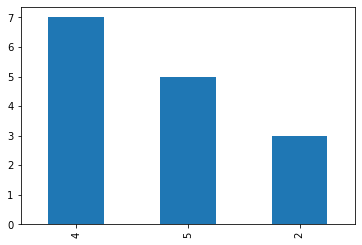

In [104]:
user_reviews.stars.value_counts().plot.bar()

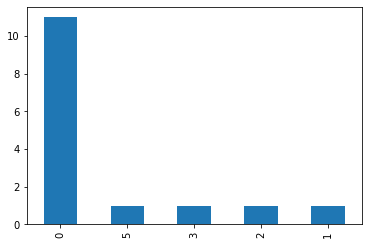

In [117]:
user_reviews.useful.value_counts().plot.bar()

#### Get Potential Spam Users and Review Information

In [49]:
# potential spam users
potential_spam_reviews = df_g_user_date[
    (df_g_user_date._id > 5) 
    # & (df_g_user_date.index.get_level_values('user_id') == 'zzPvEodjvLPe-5NvV0U_cg')
    #& (df_g_user_date.index.get_level_values('_date') == datetime.date(2013, 2, 17))
].reset_index()

In [50]:
# transformations
potential_spam_reviews._time = potential_spam_reviews._time.apply(
    lambda x: json.dumps([str(i) for i in x]))
potential_spam_reviews.business_id = potential_spam_reviews.business_id.apply(
    lambda x: json.dumps([str(i) for i in x]))
potential_spam_reviews.review_id = potential_spam_reviews.review_id.apply(
    lambda x: json.dumps([str(i) for i in x]))
potential_spam_reviews.rename(
    columns={
        '_id': 'num_of_reviews', 
        '_date': 'date',
        '_time': 'times',         
        'business_id': 'business_ids',
        'review_id': 'review_ids'
    }, 
    inplace=True
)

In [51]:
potential_spam_reviews.sample(2)

,user_id,date,num_of_reviews,times,business_ids,review_ids,count_business
13,OzwlmPcM0PZFtGH9bsS_Ow,2014-02-26,6,"[""02:58:44"", ""03:57:58"", ""01:58:29"", ""01:38:37...","[""Eif660dJb3nqORM6LF3UYg"", ""pZIKo5njTPM6XhwfRx...","[""Biq337F0c9CdLiJHpxFZwQ"", ""5bpxtMbiqsfoZFrLCb...",6
28,qKUEhJUl0Z9MFW7R7BTvRQ,2018-07-04,6,"[""05:58:32"", ""03:32:20"", ""06:33:00"", ""02:01:20...","[""mz9ltimeAIy2c2qf5ctljw"", ""DqcD3YflYhArFsC4KV...","[""f6MIfLAnpOf-nUX-eaGuig"", ""Z1JDHha1sIJOZBmcZT...",6


In [205]:
df = pd.merge(df, potential_spam_reviews, how='left', on='user_id')
df.sample(3)

,user_id,num_of_friends,date,num_of_reviews,times,business_ids,review_ids,count_business
57794,3DP3cU-opB08rbyGTLNhkA,1,NaN,NaN,NaN,NaN,NaN,NaN
288776,iKKsKXBwiNEXXXdzQNFPDQ,1,NaN,NaN,NaN,NaN,NaN,NaN
439102,vk768LgkXj_jE4q_kVeeLg,3,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
potential_spam_reviews.to_sql('user_spammers', con=engine, if_exists='replace', index=False)
pd.read_sql_table('user_spammers', con=engine).sample(2)

,user_id,date,num_of_reviews,times,business_ids,review_ids,count_business
27,q5FQmuXxzPEsvEtA_Mvd1w,2013-10-24,6,"[""07:22:56"", ""00:05:50"", ""20:55:29"", ""20:52:20...","[""DS8iFty1c_4YGn8sCIOFAA"", ""-6tvduBzjLI1ISfs3F...","[""ffSseUHxe2TmmjXUYDoK1Q"", ""5AM5SePUYzHzyeQU_6...",6
6,BMmtD4a2uTyFxDJ2qHUbSw,2009-01-30,6,"[""03:52:08"", ""02:21:57"", ""05:57:17"", ""03:01:45...","[""UQpOObEgtdyi3IyBSVEntg"", ""rxA9c0_XObabVL1WCT...","[""cK1lvv4kX6mQ_WCu35kz0g"", ""iEFLrLCfhDO3eKaF9d...",6


### Percen. of Positive Reviews

The majority of spammers have more than 80% of their reviews as 4-5 stars.

In [18]:
df_g_user_star = reviews.groupby(
    by=['user_id', 'stars']).agg({'_id': 'count'}).reset_index()
user_star_pivot = df_g_user_star.pivot_table(
    values='_id', index='user_id', columns='stars',fill_value=0)
user_star_pivot.rename(columns={1:'a',2:'b',3:'c',4:'d',5:'e'}, inplace=True)

In [19]:
df_g_user_star.head(3)

,user_id,stars,_id
0,---1lKK3aKOuomHnwAkAow,1,1
1,---1lKK3aKOuomHnwAkAow,2,2
2,---1lKK3aKOuomHnwAkAow,3,5


In [20]:
user_star_pivot.sample(3)

stars,a,b,c,d,e
user_id,,,,,
pkn7wB8YgT0NujbgWF6Y0Q,0,0,0,0,2
wk7Y3jxqmXrlfm6Uwp0NVg,1,0,0,0,0
gRXdF6YAaXc8mneTRihLJA,0,0,0,0,1


In [21]:
user_star_pivot['total_of_reviews'] = user_star_pivot.apply(
    lambda x: sum(x), axis=1)
user_star_pivot['perc_of_positive'] = user_star_pivot.apply(
    lambda x: round((x.d + x.e) / (x.a + x.b + x.c + x.d + x.e) * 100), axis=1)

In [43]:
user_star_pivot.reset_index().loc[:,['user_id', 'perc_of_positive']].to_sql(
    'user_positive_percentage', con=engine, if_exists='replace', index=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x192b96dd0>],
      dtype=object)

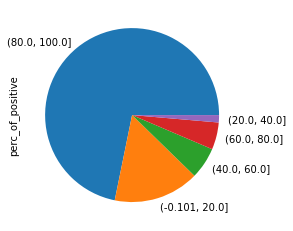

In [24]:
user_star_pivot.perc_of_positive.value_counts(bins=5).plot.pie(subplots=True)

In [25]:
user_star_pivot[user_star_pivot.total_of_reviews > 5].sample(3)

stars,a,b,c,d,e,total_of_reviews,perc_of_positive
user_id,,,,,,,
Xv_6lnK2sudSD8IrwDI8rQ,0,0,2,5,0,7,71.0
WoJNVbll5hJ1JJDNXWosYQ,0,1,0,4,9,14,93.0
VFP5b5ZXPHmtiFjD-Kftiw,2,2,5,1,11,21,57.0


In [273]:
potential_spamers = user_star_pivot[
    (user_star_pivot.total_of_reviews > 5)
    & (user_star_pivot.perc_of_positive > 79)
]
potential_spamers.sample(3)

stars,a,b,c,d,e,total_of_reviews,perc_of_positive
user_id,,,,,,,
KgFOJnWXxVuz0b-xfo6jjw,0,0,2,7,5,14,86.0
WU9eoIz9KCcSB4bAxhOHXQ,1,0,0,1,4,6,83.0
6CzDXsYJNXLLbmDAaES4tQ,0,0,0,5,1,6,100.0


In [275]:
df = pd.merge(df, potential_spamers, how='left', on='user_id')
df.sample(3)

,user_id,num_of_friends,date,num_of_reviews,times,business_ids,review_ids,count_business,a,b,c,d,e,total_of_reviews,perc_of_positive
220588,wTktJ6qT8C5i-QuOplizAQ,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332282,gBfZZs7nyf4UMFqy82Mkmg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295133,ZTUJKJ993ntpDiqABLM5_Q,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
potential_spamers.to_sql('user_positive_percentage', con=engine, if_exists='replace', index=False)
pd.read_sql_table('user_positive_percentage', con=engine).sample(3)

,a,b,c,d,e,total_of_reviews,perc_of_positive
1818,0,0,1,7,1,9,89.0
2294,0,0,0,5,1,6,100.0
630,0,0,0,2,6,8,100.0


### Review Length

The average length of reviews of spammers are generally short due to too much time of writing. Reviews shorter than 140 are generally spammers.

In [281]:
df_g_user_length = reviews.groupby(
    by=['user_id']).agg({'_id': 'count', 'text': list})

In [282]:
df_g_user_length.sample(3)

,_id,text
user_id,,
Uk25yW9c7G9YgK9_MSHJKg,2,[Get a macaroon for enjoying immediately and a...
py4MyhThMBV4d4ZUK0AwoQ,1,[Marco's delivers an average pizza. Nothing to...
srM23EoCcFvjnBTddScPdg,1,[A tie for the best cappuccino in Montreal (in...


In [287]:
df_g_user_length['review_length'] = df_g_user_length.apply(
    lambda x: round(sum(map(len, x.text))/len(x.text)), axis=1)

In [286]:
df_g_user_length.sample(3)

,_id,text,review_length
user_id,,,
Z7JMhAYRgJjck2nkf88C8A,1,[Tried this place out and it was delicious! We...,505.000000
ST5KHMoxf9d7BDZnfLLsTg,3,[Wings! \n\nThis place is near my office and w...,955.666667
OLQakyycSIwbdBMoPFte8Q,1,"[Overall, this place isn't the worst. It is ov...",1291.000000


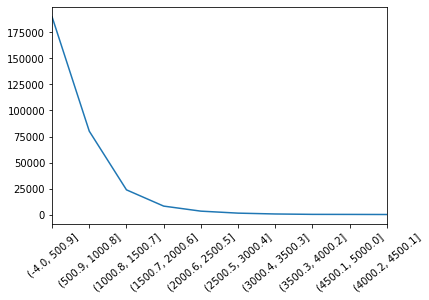

In [344]:
df_g_user_length.review_length.value_counts(bins=10).plot(rot=40)

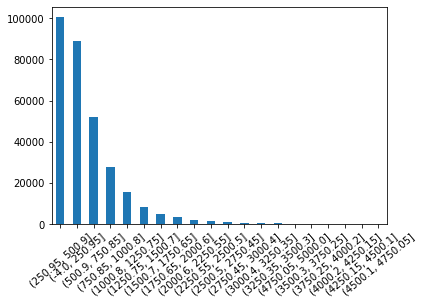

In [365]:
df_g_user_length.review_length.value_counts(bins=20).plot.bar(rot=40)

In [357]:
df = pd.merge(df, df_g_user_length.review_length, how='left', on='user_id') 
df.sample(3)

,user_id,num_of_friends,date,num_of_reviews,times,business_ids,review_ids,count_business,a,b,...,total_of_reviews,perc_of_positive,review_length_x,review_length_y,review_length_x,review_length_y,review_length_x,review_length_y,review_length_x,review_length_y
434814,nm2qMM3qXVFYiCK14qeVtQ,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107506,XqYA1-4dspxCUZTT8NFEPw,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259268,siUApY3QQRPhe8XHY-OsSA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reviewer Deviation

Diversion from the general rating consensus. To measure reviewer’s deviation, we first compute the absolute rating deviation of a review from other reviews on the same business. Then, we compute the expected rating deviation of a reviewer over all his reviews. On a 5-star scale, the deviation can range from 0 to 4. Above 2.5 is spammer.

### Maximum Content Similarity

The cosine similarity between any two reviews of a reviewer. This feature should the the lower the better. Non spamers are less than .20 and above .30 is generally spammers.

### Multiple Reviews in a day and Business Locations

Writing multiple reviews to multiple cities is suspicious for a reviewer. If that's the case, then These people might be potential spammers.

## Create Friends Mapping

## Create the Table

### meta table

In [ ]:
df.to_sql(name='users_meta', con=engine, index=False)

In [ ]:
pd.read_sql_table('users_meta', engine).head(2)